In [1]:
import h5py, sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
sys.path.append('/mnt/cbis/home/benedikt/.local/dragonfly/utils/py_src')

In [3]:
import writeemc
import detector
import reademc

In [4]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"
path_to_recons = "../../data/recons/"

In [5]:
emc_folder = path_to_recons + "template_0000/"
emc_output = emc_folder + "data/output_001.h5"
emc_photons = emc_folder + 'photons.txt'

In [6]:
with h5py.File(emc_folder + './data/scaling_maps_1.h5','r') as f:
    pscale = f['map_pscale'][:]
    iscale = f['map_iscale'][:]
    likelihood = f['likelihood'][:]
    map_volume = f['map_volume'][:]
    map_model = f['map_model'][:]
    #map_orientations = f['map_orientations'][:]
    #map_likelihood = f['map_likelihood'][:]

In [7]:
model = map_model[0,-1]

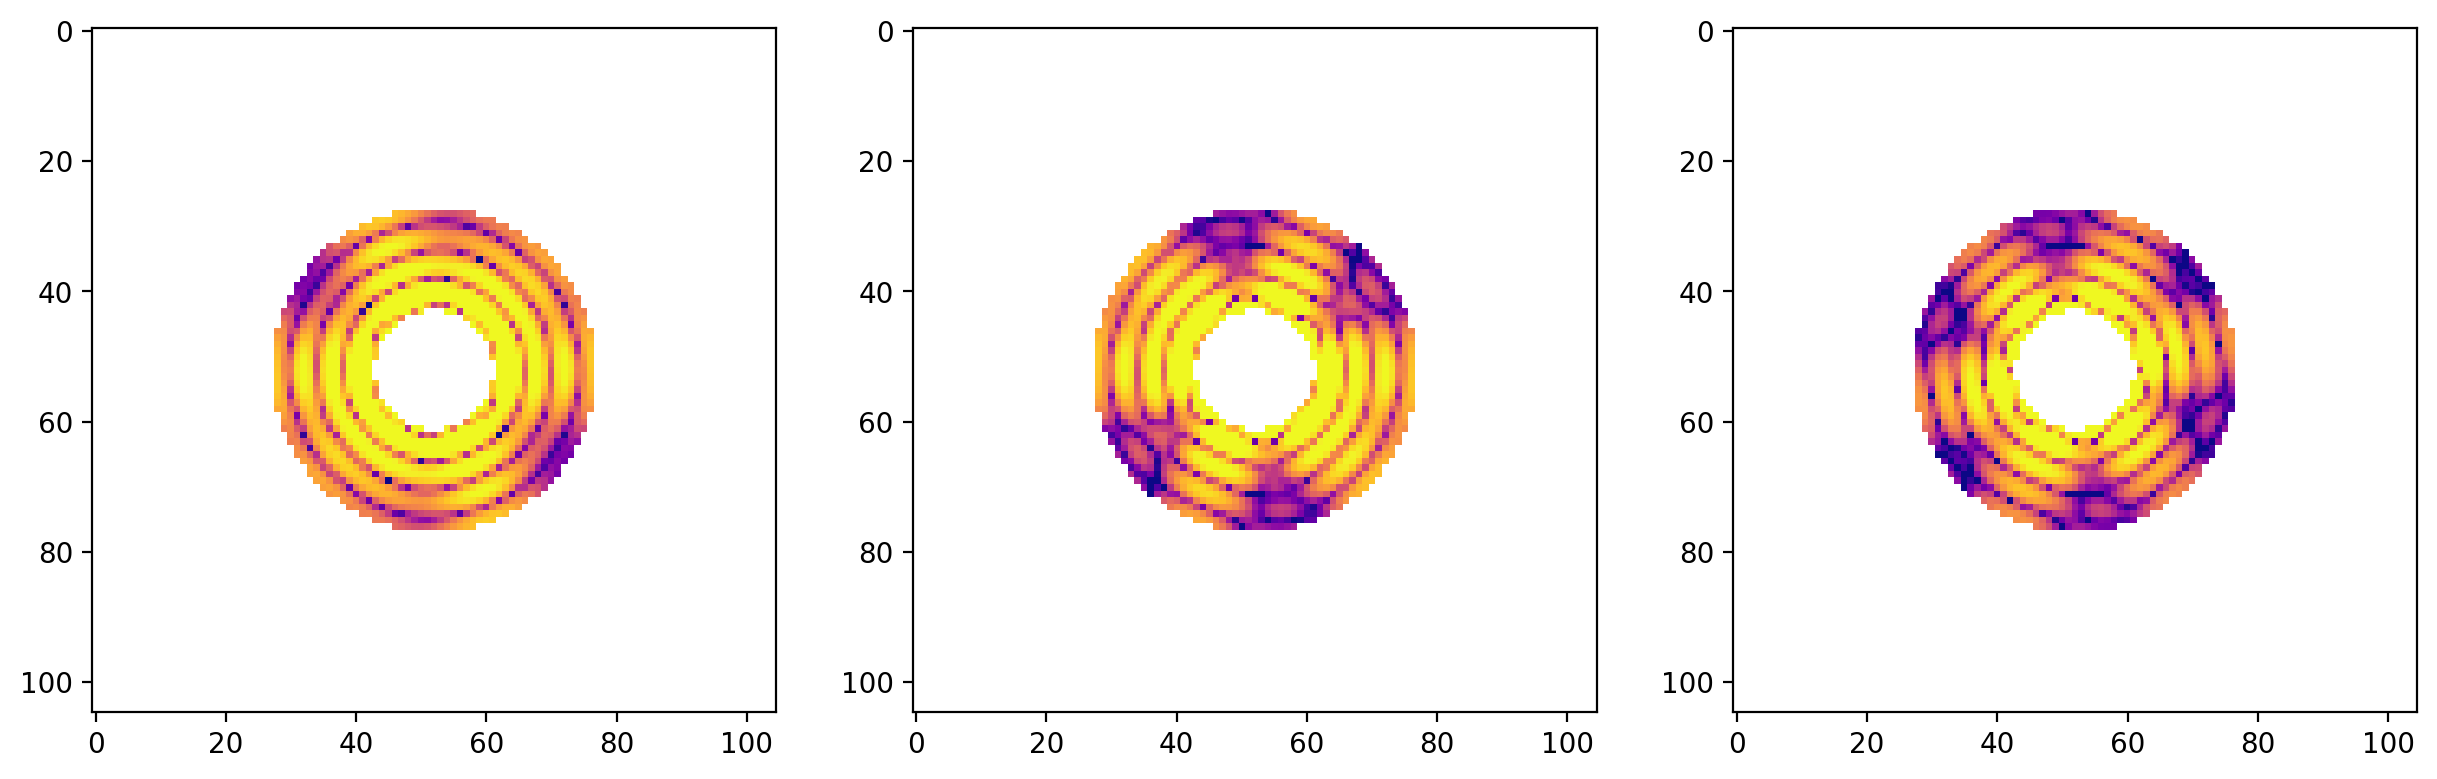

In [9]:
nx,ny,nz = model.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
#[ax.axis('off') for ax in axes]
axes[0].imshow(model[nx//2],     norm=colors.LogNorm(vmin=0.001, vmax=5), cmap='plasma')
axes[1].imshow(model[:,ny//2],   norm=colors.LogNorm(vmin=0.001, vmax=5), cmap='plasma')
axes[2].imshow(model[:,:,nz//2], norm=colors.LogNorm(vmin=0.001, vmax=5), cmap='plasma')
plt.show()

In [73]:
volume = map_volume[9,0]

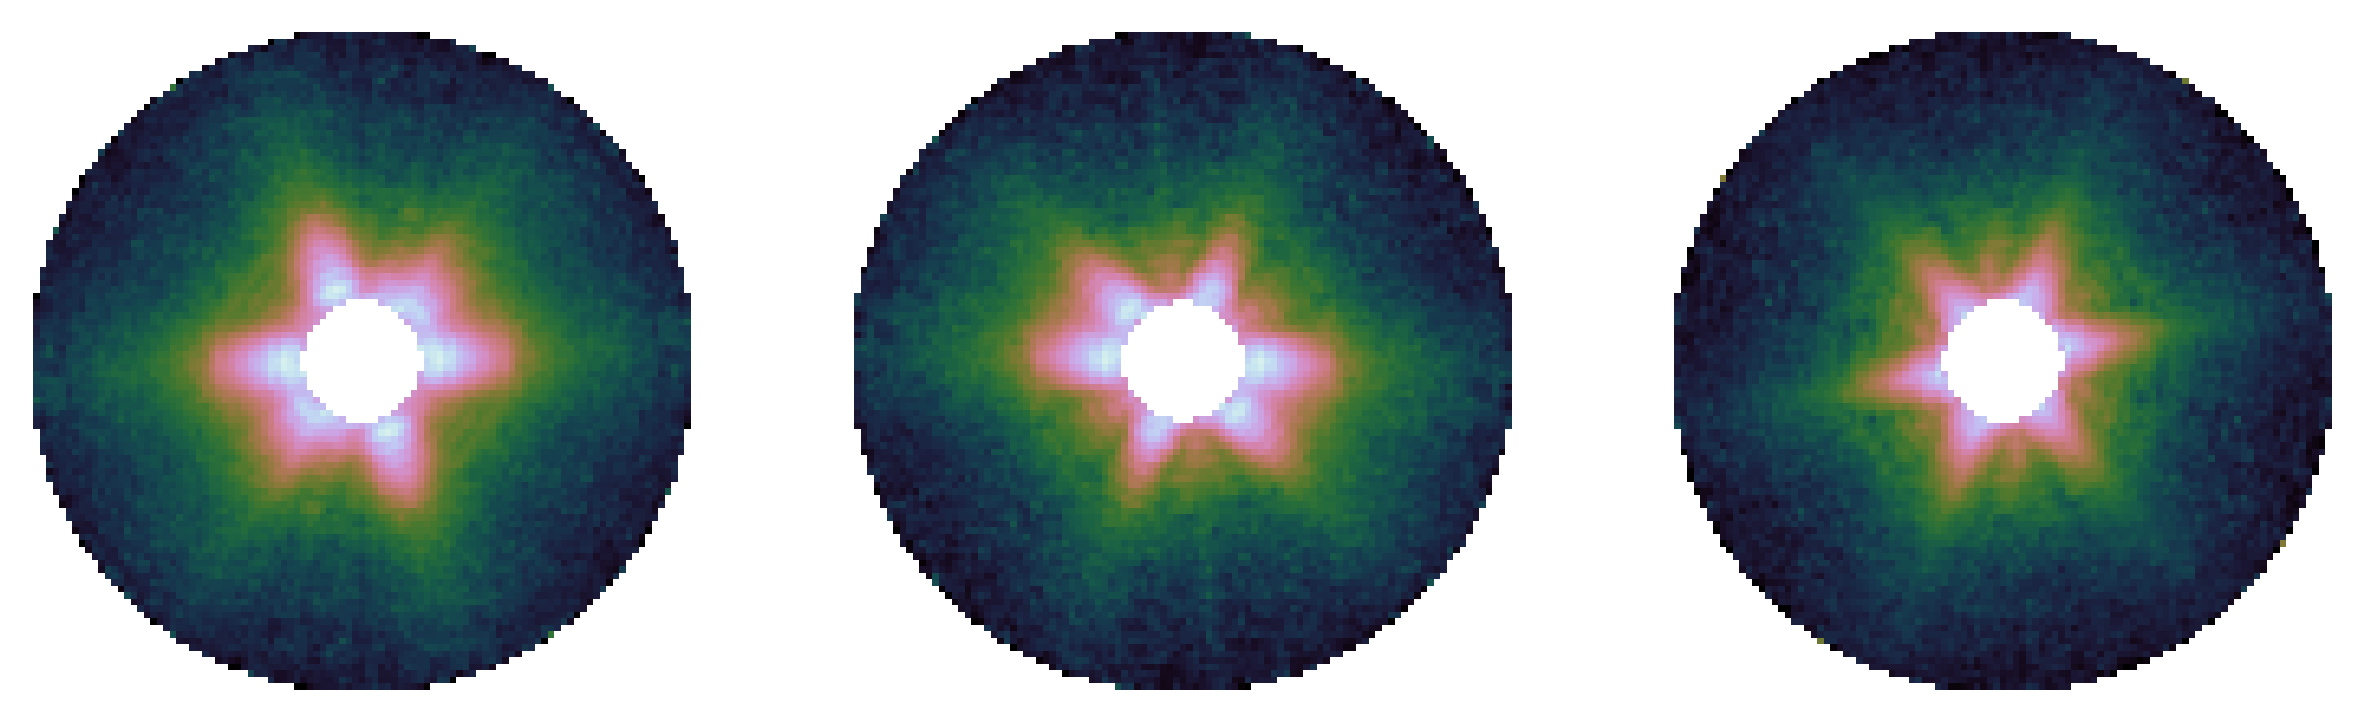

In [75]:
nx,ny,nz = volume.shape
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=200)
[ax.axis('off') for ax in axes]
axes[0].imshow(volume[nx//2],     norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
axes[1].imshow(volume[:,ny//2],   norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
axes[2].imshow(volume[:,:,nz//2], norm=colors.LogNorm(vmin=0.001, vmax=10), cmap='cubehelix')
plt.show()

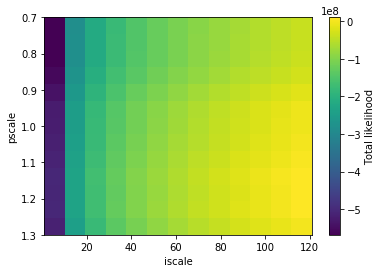

In [86]:
plt.imshow(likelihood, extent=[iscale[0,0], iscale[0,-1],pscale[-1,0], pscale[0,0]], aspect='auto', vmax=None)
plt.xlabel("iscale")
plt.ylabel("pscale")
plt.colorbar(label='Total likelihood')
plt.show()

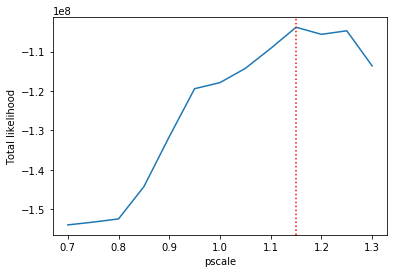

In [72]:
plt.plot(pscale[:,0], likelihood.mean(axis=1))
plt.axvline(pscale[9,0], color='r', ls=':')
#plt.title("pscale: %.2f" %(pscale[9,0]))
plt.xlabel("pscale")
plt.ylabel("Total likelihood")
plt.show()